In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



sns.set_theme(style="whitegrid")

In [134]:
df = pd.read_csv('../data/data.csv', sep=";")
df.columns = df.columns.str.strip()
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [135]:
print("Shape: ", df.shape)

Shape:  (4424, 37)


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [137]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [138]:
df.isnull().sum().sort_values(ascending=False)

Marital status                                    0
Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
International                                     0
Scholarship holder                                0
Application 

In [139]:
df = df[df["Target"] != "Enrolled"]
df["Target"] = df["Target"].map({"Dropout": 1, "Graduate": 0})

print("New value counts for Target:")
print(df["Target"].value_counts())


New value counts for Target:
Target
0    2209
1    1421
Name: count, dtype: int64


In [140]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()


In [141]:
print("Categorical columns:\n", cat_cols)



Categorical columns:
 []


In [142]:
print("Numeric columns:\n", num_cols)

Numeric columns:
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Targ

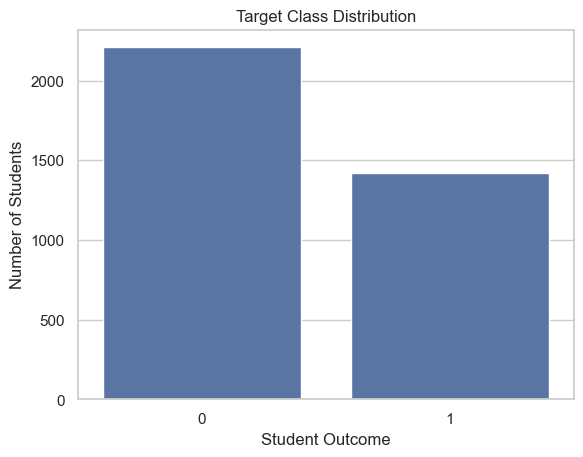

In [143]:
sns.countplot(data=df, x="Target")
plt.title("Target Class Distribution")
plt.xlabel("Student Outcome")
plt.ylabel("Number of Students")
plt.show()

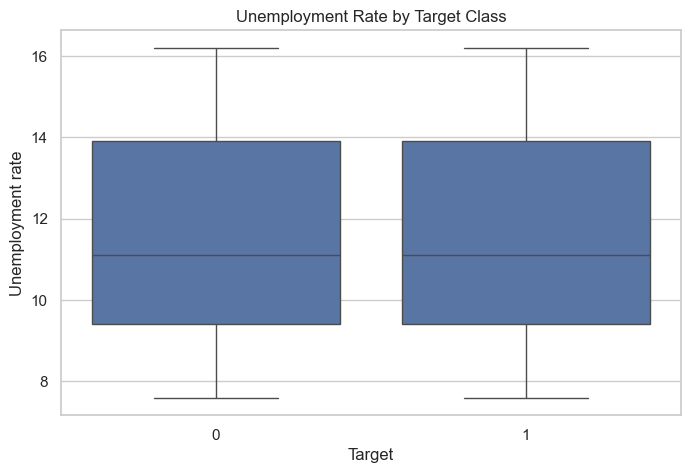

In [144]:
# Plot unemployment rate by target class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Target", y="Unemployment rate")
plt.title("Unemployment Rate by Target Class")
plt.show()


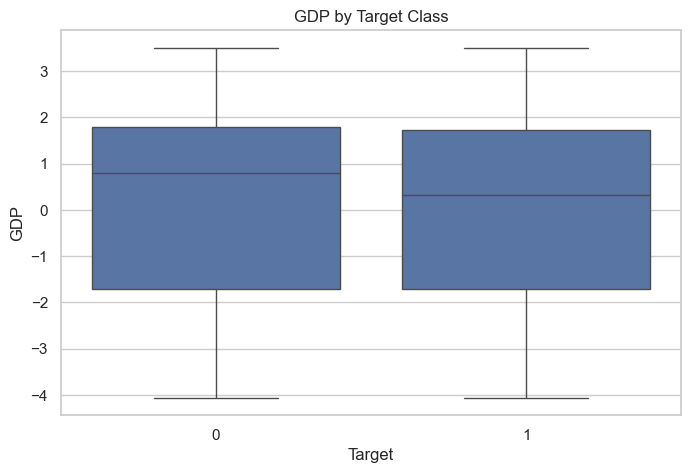

In [145]:
# Plot GDP by target class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Target", y="GDP")
plt.title("GDP by Target Class")
plt.show()


In [146]:
df["Application mode"] = df["Application mode"].astype("category")
df["Marital status"] = df["Marital status"].astype("category")
df["Daytime/evening attendance"] = df["Daytime/evening attendance"].astype("category")


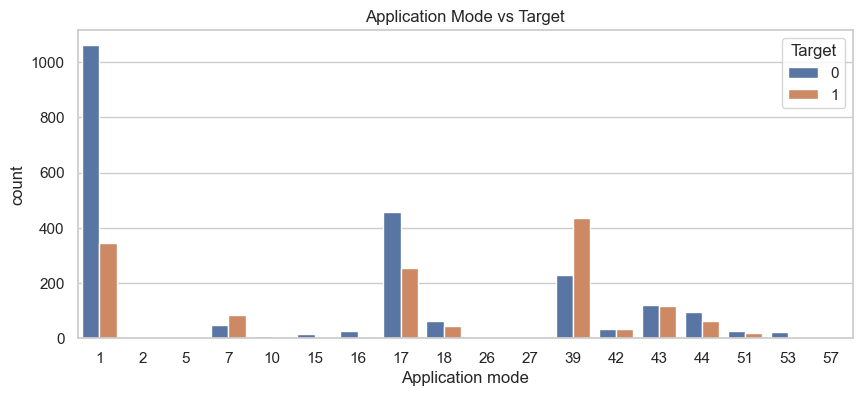

In [147]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Application mode", hue="Target")
plt.title("Application Mode vs Target")
plt.legend(title="Target")
plt.show()

In [148]:
categorical_cols = [col for col in categorical_cols if col != "Target"] # Exclude 'Target' from categorical columns
print("Categorical columns:\n", categorical_cols)

Categorical columns:
 []


In [149]:
df_clean = df.copy()
df_clean.columns = df_clean.columns.str.strip()

categorical_cols = df_clean.select_dtypes(include="object").columns.tolist()
categorical_cols = [col for col in categorical_cols if col != "Target"]

X = df_clean.drop(columns=["Target"], axis=1)
y = df_clean["Target"]

In [150]:
le = LabelEncoder()

# Encode categorical columns
for col in categorical_cols:
    X[col] = le.fit_transform(X[col]) # Ensure all values are strings before encoding


In [151]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X) # Fit and transform the data


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

## First Machine Learning Model - Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [154]:
# First Machine Learning Model - Logistic Regression
lr_model = LogisticRegression(
  multi_class="multinomial",
  class_weight="balanced",
  max_iter=1000,
  random_state=42
)

In [155]:
lr_model.fit(X_train, y_train) # Fit the model to the training data

/Users/bartug/Desktop/development/MLProjects/student-dropout-prediction/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [156]:
y_pred = lr_model.predict(X_test) # Make predictions on the test set

In [158]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

Confusion Matrix:
[[409  40]
 [ 32 245]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.93      0.91      0.92       449
    Graduate       0.86      0.88      0.87       277

    accuracy                           0.90       726
   macro avg       0.89      0.90      0.90       726
weighted avg       0.90      0.90      0.90       726

